In [3]:
# import libraries
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')


In [4]:
# created a new csv with merged grocery store datasets to perform EDA
# read in csv
store = pd.read_csv('../Jonathan/Resources/new_training.csv')
store.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,month,year,day,week
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
4,4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1


In [5]:
# Importing train data
train = pd.read_csv('../Jonathan/Resources/new_training.csv', index_col='date', parse_dates = True)
train

,Unnamed: 0,id,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,month,year,day,week
date,,,,,,,,,,,,,,,,
2013-01-01,0,0,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
2013-01-01,1,1,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
2013-01-01,2,2,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
2013-01-01,3,3,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
2013-01-01,4,4,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3054343,3000883,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,8,2017,15,33
2017-08-15,3054344,3000884,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,8,2017,15,33
2017-08-15,3054345,3000885,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,8,2017,15,33


In [ ]:
# # Sales trend over the months and year
# plt.figure(figsize=(10,10))
# sns.factorplot(data = train, x ="month", y = "sales", 
#                col = 'onpromotion', # per store type in cols
#                row = "year")


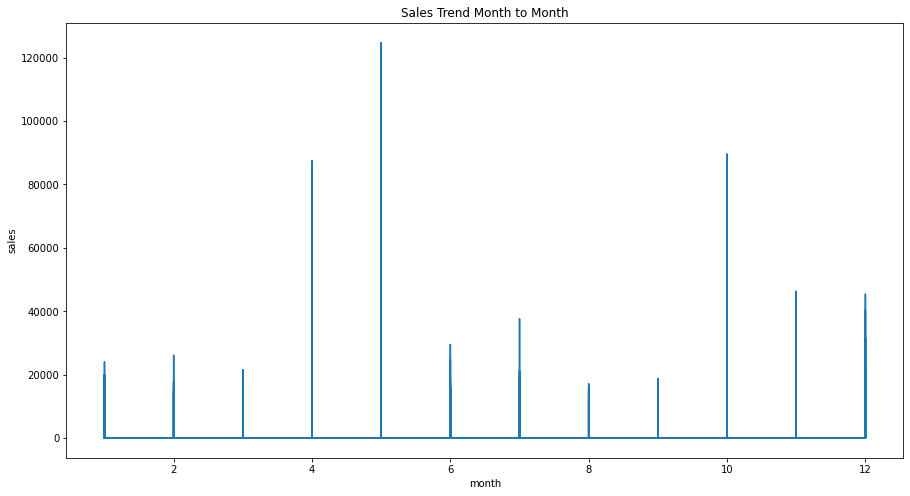

In [13]:
# Graph customize
plt.rcParams['figure.figsize'] = (15,8)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('Sales Trend Month to Month')

line_graph_1 = plt.plot(train['month'],train['sales'])

In [ ]:
# Sales trend over days
sns.factorplot(data = train, x = "day", y = "sales", hue = "onpromotion")

In [18]:
# Creating a train dataset
train_prophet = train.copy()
train_prophet.reset_index(level=0, inplace=True)
# Converting col names to specific names as required by Prophet library
train_prophet = train_prophet.rename(columns = {'date': 'ds',
                                'sales': 'y'})
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet.set_index("ds").resample("W").sum()
ts_week_prophet


,Unnamed: 0,id,store_nbr,y,onpromotion,dcoilwtico,month,year,day,week
ds,,,,,,,,,,
2013-01-06,57154086,57154086,294030,2.211570e+06,0,497587.86,10692,21522996,37422,10692
2013-01-13,211166109,211166109,343035,2.373618e+06,0,832015.80,12474,25110162,124740,24948
2013-01-20,366766785,366766785,343035,2.368007e+06,0,842725.62,12474,25110162,212058,37422
2013-01-27,522367461,522367461,343035,2.272165e+06,0,680100.30,12474,25110162,299376,49896
2013-02-03,677968137,677968137,343035,2.476891e+06,0,867228.12,17820,25110162,220968,62370
...,...,...,...,...,...,...,...,...,...,...
2017-07-23,37510871013,36844010973,343035,5.744335e+06,87310,413477.46,87318,25160058,249480,361746
2017-07-30,37666471689,36999611649,343035,5.921812e+06,80675,430050.06,87318,25160058,336798,374220
2017-08-06,37822072365,37155212325,343035,6.410194e+06,75624,441223.20,98010,25160058,92664,386694


In [12]:
# Fitting data to Prophet model
prophet_1 = Prophet() 
prophet_1.fit(ts_week_prophet)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.